<a href="https://colab.research.google.com/github/w15d0177/AIFFEL_project/blob/main/Computer_Vision/cv_project_1_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✅ 1-1. VGG16 모델 구현하기**      
     
  직접 코드로 모델을 구현해 보세요. Batch Normalization, Parameter Initialization 등을 사용할 수도 있습니다.

In [5]:
# 필요한 라이브러리 가져오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 고양이와 개 이미지가 포함된 데이터셋 cats_and_dogs_filtered.zip이 저장된 url 정의
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# zip 파일을 다운로드하여 압축을 해제 / 파일 경로를 변수 path_to_zip에 저장
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# 최종 경로를 변수 path에 저장
path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [7]:
# train 데이터에서 고양이와 개의 이미지가 저장된 경로 저장
train_dir = os.path.join(path, 'train')

# validation 데이터에서 고양이와 개의 이미지가 저장된 경로 저장
validation_dir = os.path.join(path, 'validation')

print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [8]:
# train 데이터의 고양이 이미지가 저장된 경로
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# train 데이터의 개 이미지가 저장돤 경로
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# validation 데이터의 고양이 이미지가 저장된 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# validation 데이터의 개 이미지가 저장된 경로
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [9]:
# train 데이터의 고양이 이미지 개수
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)

# train 데이터의 개 이미지 개수
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

# validation 데이터의 고양이 이미지 개수
num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)

# validation 데이터의 개 이미지 개수
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

# train 데이터 총 개수
total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)

# validation 데이터 총 개수
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
# 파라미터 초기화
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [11]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [12]:
# Train 데이터 - 데이터 증강을 위한 제너레이터
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [13]:
# Train 데이터 - 파이프라인을 통해 디렉토리와 작업 환경 연결
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
# 데이터 증강 확인
# train 데이터 제너레이터는 큰 데이터셋을 메모리에서 한 번에 불어오는 대신 작은 배치(batch) 단위로 나눠서 처리할 수 있도록 하는 객체
# 첫 번째 배치(batch) 내의 입력 데이터
train_data_gen[0][0].shape

(16, 256, 256, 3)

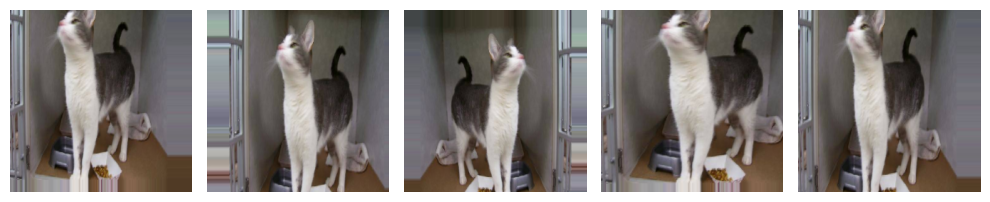

In [15]:
# train_data_gen에서 첫 번째 배치의 첫 번째 이미지를 5번 반복하여 저장 - augmented_images라는 list에 5개의 동일한 이미지 저장
# matplotlib.pyplot 모듈을 plt로 가져오기
import matplotlib.pyplot as plt

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
# validation 데이터 - 데이터 증강을 위한 제너레이터
# validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경
image_gen_val = ImageDataGenerator(rescale=1./255)

In [17]:
# validation 데이터 - 파이프라인을 통해 디렉토리와 작업 환경 연결
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


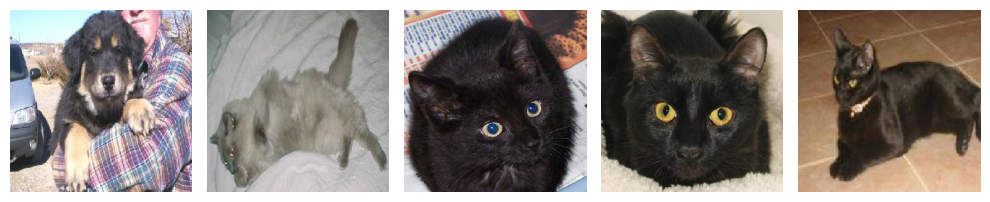

In [18]:
# validation 데이터 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [19]:
# 정답 데이터
_[:5]

array([1., 0., 0., 0., 0.], dtype=float32)

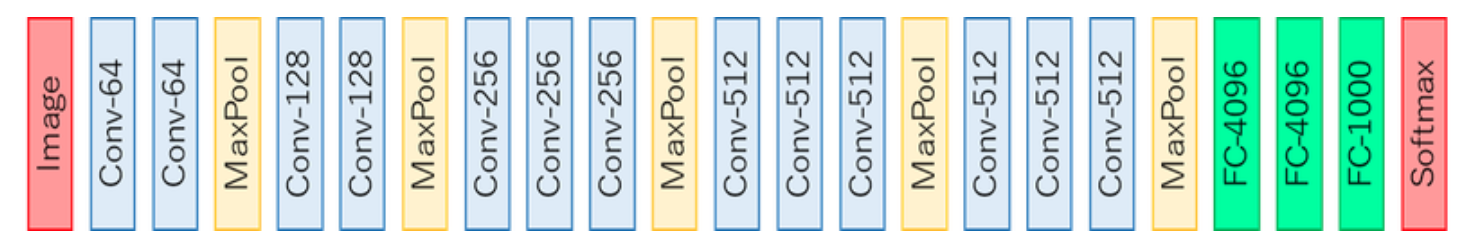

In [20]:
# 이미지에 나온 VGG16 모델 구현

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))

# Block 1
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same')(input_layer)  # 첫 번째 convolution layer - padding='same'을 사용해 입력과 출력의 크기를 동일하게 유지
x = tf.keras.layers.BatchNormalization()(x)  # batch normalization
x = tf.keras.layers.Activation('relu')(x)  # 활성화 함수 적용
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same')(x)  # 두 번째 convolution layer
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)  # (2, 2) 크기의 풀링을 사용해 각 블록의 출력 크기를 절반으로 줄임

# Block 2
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 3
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 4
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 5
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 다차원 텐서를 1차원으로 평탄화하여 fully connected 레이어에 연결할 준비
x = tf.keras.layers.Flatten()(x)

# 3개의 fully connected layers
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)

# 출력 layer
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
#model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# 모델 구조 출력
#model.summary()

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,0

 Total params: 169,832,721 (647.86 MB)

 Trainable params: 169,824,273 (647.83 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [21]:
# 모델 컴파일 - 손실 함수, 옵티마이저, 평가지표 설정
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy

model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [22]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5


TypeError: 'float' object cannot be interpreted as an integer

In [23]:
import os
import math

# ... (rest of your code) ...

# Model training
history = model.fit(
    train_data_gen,
    steps_per_epoch=math.ceil((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size), # math.ceil 함수를 통해 반올림하여 정수값 얻기
    epochs=epochs,
    validation_data=val_data_gen,
    # callbacks=callbacks_list,
    validation_freq=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 116s 541ms/step - binary_accuracy: 0.5253 - loss: 3449.3062 - val_binary_accuracy: 0.5000 - val_loss: 10.4799
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 10.4799
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 432ms/step - binary_accuracy: 0.4983 - loss: 2.0872 - val_binary_accuracy: 0.5190 - val_loss: 0.9040
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5190 - val_loss: 0.9040
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 56s 434ms/step - binary_accuracy: 0.4968 - loss: 1.6172 - val_binary_accuracy: 0.5010 - val_loss: 0.6937


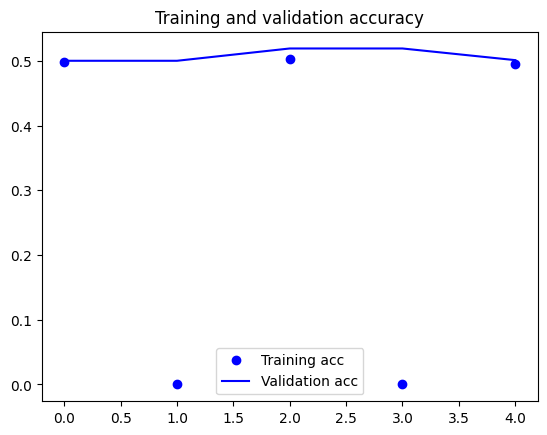

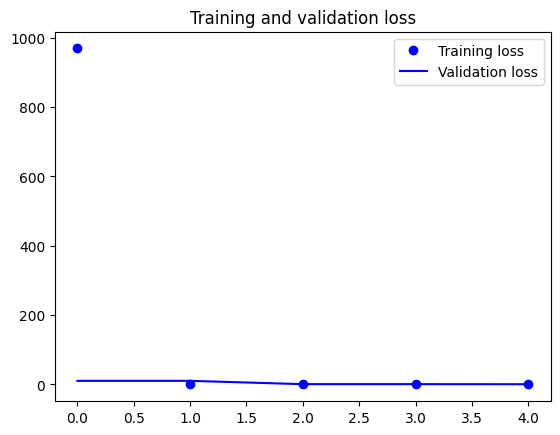

In [24]:
# 시각화를 통해 정확도 확인
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **✅ 1-2. 다양한 방법을 사용하여 모델의 성능 올리기**       
       
  hyperparameter 변경, 모델 수정, optimizer 변경, skip connection, pre-trained model 등 다양한 방법을 사용하면 모델의 성능을 높일 수 있습니다. 다양한 실험을 통해 성능을 올려 보세요.     






# **(1) batch 크기 변경**

In [25]:
# 하이퍼파라미터 설정
batch_size = 32
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

## **(2) 제너레이터 설정 변경**

Found 2000 images belonging to 2 classes.


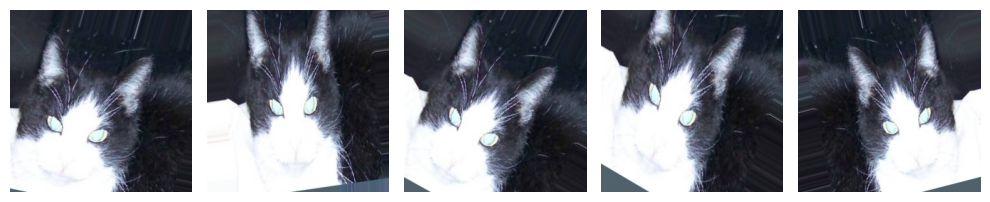



Found 1000 images belonging to 2 classes.


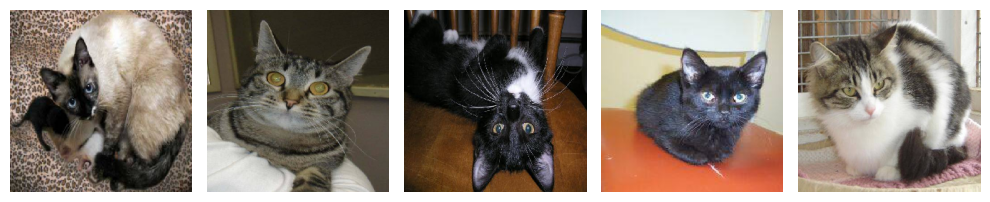

array([0., 0., 0., 0., 0.], dtype=float32)

In [26]:
# Train 데이터 제너레이터
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=30, # 이미지를 무작위로 회전시키는 각도 - 0.3 -> 30도로 변경
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

print()
print()

# Validation 데이터 제너레이터
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

print()
print()

# 정답 데이터
_[:5]


## **(3) skp connection 적용**      
     
  각 블록에 skip connection을 적용해 깊은 네트워크에서도 기울기 소실 문제를 완화하고 학습 안정성을 높일 수 있습니다.     
  ResNet 스타일의 skip connection을 사용했으며, 이는 깊은 네트워크에서 성능을 향상시킬 수 있습니다.

In [35]:

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))

# Block 1
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same')(input_layer)  # 첫 번째 convolution layer - padding='same'을 사용해 입력과 출력의 크기를 동일하게 유지
x = tf.keras.layers.BatchNormalization()(x)  # batch normalization
x = tf.keras.layers.Activation('relu')(x)  # 활성화 함수 적용
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same')(x)  # 두 번째 convolution layer
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
# Skip connection for Block 1
# 1x1 Convolution to match the number of channels
skip_connection = tf.keras.layers.Conv2D(64, (1, 1), strides=1, padding='same')(input_layer)
x = tf.keras.layers.Add()([skip_connection, x])  # input_layer와 x를 더함
x = tf.keras.layers.MaxPool2D((2, 2))(x)
# 각 블록 마지막에 MaxPooling을 사용해 출력 크기를 줄였고, 이 과정에서 차원이 동일하게 유지되기 때문에 skip connection을 바로 적용
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 2
skip_connection = x  # Skip connection을 위해 블록 시작 시 입력 저장
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
# Skip connection for Block 2 (차원 맞추기)
# 1x1 Convolution to match the number of channels of skip_connection to x
skip_connection = tf.keras.layers.Conv2D(128, (1, 1), strides=1, padding='same')(skip_connection)
x = tf.keras.layers.Add()([skip_connection, x])  # skip_connection과 x를 더함
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 3
skip_connection = x  # Skip connection을 위해 블록 시작 시 입력 저장
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
# Skip connection for Block 3 (차원 맞추기)
# 1x1 Convolution to match the number of channels of skip_connection to x
skip_connection = tf.keras.layers.Conv2D(256, (1, 1), strides=1, padding='same')(skip_connection)
x = tf.keras.layers.Add()([skip_connection, x])
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 4
skip_connection = x  # Skip connection을 위해 블록 시작 시 입력 저장
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
# Skip connection for Block 4 (차원 맞추기)
# 1x1 Convolution to match the number of channels of skip_connection to x
skip_connection = tf.keras.layers.Conv2D(512, (1, 1), strides=1, padding='same')(skip_connection)
x = tf.keras.layers.Add()([skip_connection, x])
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Block 5
skip_connection = x  # Skip connection을 위해 블록 시작 시 입력 저장
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
# Skip connection for Block 5 (차원 맞추기)
# 1x1 Convolution to match the number of channels of skip_connection to x
skip_connection = tf.keras.layers.Conv2D(512, (1, 1), strides=1, padding='same')(skip_connection)
x = tf.keras.layers.Add()([skip_connection, x])
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 다차원 텐서를 1차원으로 평탄화하여 fully connected 레이어에 연결할 준비
x = tf.keras.layers.Flatten()(x)

# 3개의 fully connected layers
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)

# 출력 layer
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
#model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# 모델 구조 출력
#model.summary()

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_46 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_41    │ (None, 256, 256, 64)   │            256 │ conv2d_46[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_41             │ (None, 256, 256, 64)   │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ activation_41[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_42    │ (None, 256, 256, 64)   │            256 │ conv2d_47[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 256, 256, 64)   │            256 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_42             │ (None, 256, 256, 64)   │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 256, 256, 64)   │              0 │ conv2d_48[0][0],       │
│                           │                        │                │ activation_42[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 128, 128, 64)   │              0 │ add_7[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 64, 64, 64)     │              0 │ max_pooling2d_15[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_49 (Conv2D)        │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_43    │ (None, 64, 64, 128)    │            512 │ conv2d_49[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_43             │ (None, 64, 64, 128)    │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_50 (Conv2D)   

 Total params: 69,605,265 (265.52 MB)

 Trainable params: 69,596,817 (265.49 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [36]:
# loss function, optimizer, metric 설정 및 모델 컴파일
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy

model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [37]:
# 모델 학습
import os
import math

# ... (rest of your code) ...

# Model training
history = model.fit(
    train_data_gen,
    steps_per_epoch=math.ceil((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size), # math.ceil 함수를 통해 반올림하여 정수값 얻기
    epochs=epochs,
    validation_data=val_data_gen,
    # callbacks=callbacks_list,
    validation_freq=1)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 92s 925ms/step - binary_accuracy: 0.4884 - loss: 17750.6582 - val_binary_accuracy: 0.5020 - val_loss: 70.6446
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5020 - val_loss: 70.6446
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 623ms/step - binary_accuracy: 0.4962 - loss: 7.3401 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 607ms/step - binary_accuracy: 0.5072 - loss: 0.6931 - val_binary_accuracy: 0.5000 - val_loss: 0.6932


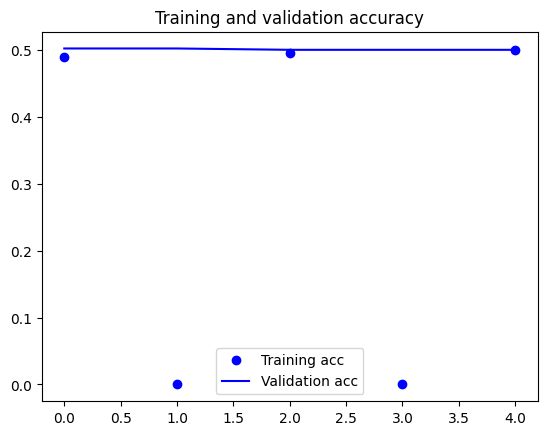

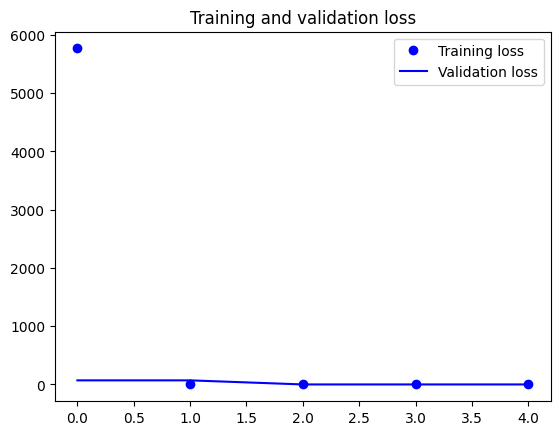

In [39]:
# 시각화를 통해 정확도 확인
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **(4) 결론**      
- 설정 변경 이전      
binary_accuracy: 0.4968 - loss: 1.6172 - val_binary_accuracy: 0.5010 - val_loss: 0.6937       
- 설정 변경 이후        
binary_accuracy: 0.5072 - loss: 0.6931 - val_binary_accuracy: 0.5000 - val_loss: 0.6932     
     
     
          
미미하지만 train 데이터의 정확도가 향상되고 손실도 눈에 띄게 줄었다. validation 데이터의 손실은 감소한 반면 정확도는 더 낮은 수치를 보였지만 그 정도가 아주 미미하여, train 데이터에 대한 성능 향상만으로도 의미 있는 설정 변경이었다.   